<a href="https://colab.research.google.com/github/cafaizi/floweroflower/blob/main/CNN_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob, os, random
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/drive/MyDrive/flowers dataset'
train_dir = os.path.join(data_dir, '/content/drive/MyDrive/flowers dataset/training')
test_dir = os.path.join(data_dir, '/content/drive/MyDrive/flowers dataset/testing')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ARCHITECTURE

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      width_shift_range=0.2,
      height_shift_range=0.2,
      rotation_range=40,
      horizontal_flip=True,
      validation_split=0.2,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size=(320,240),  
        batch_size=20,
        color_mode="grayscale",
        class_mode='categorical',
        subset='training',
        seed=0)

Found 240 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(320,240),
        batch_size=20,
        color_mode="grayscale",
        class_mode='categorical',
        subset='validation',
        seed=0)

Found 60 images belonging to 3 classes.


##TRAINING & TESTING (LR = 0.1)


In [ ]:
model01 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(320,240,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 316, 236, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 158, 118, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 154, 114, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 77, 57, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 280896)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               71909632  
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [ ]:
model01.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['acc'])

In [ ]:
model01.fit_generator(train_generator, epochs=50, validation_data=test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
12/12 [==============================] - 156s 10s/step - loss: 100399.1406 - acc: 0.3500 - val_loss: 1.1613 - val_acc: 0.3333
Epoch 2/50
12/12 [==============================] - 3s 275ms/step - loss: 6.3743 - acc: 0.3667 - val_loss: 1.1171 - val_acc: 0.3333
Epoch 3/50
12/12 [==============================] - 3s 272ms/step - loss: 1.1569 - acc: 0.3292 - val_loss: 1.0987 - val_acc: 0.3333
Epoch 4/50
12/12 [==============================] - 3s 273ms/step - loss: 1.1198 - acc: 0.3250 - val_loss: 1.1326 - val_acc: 0.3333
Epoch 5/50
12/12 [==============================] - 3s 273ms/step - loss: 1.1424 - acc: 0.3000 - val_loss: 1.1008 - val_acc: 0.3333
Epoch 6/50
12/12 [==============================] - 3s 268ms/step - loss: 1.1041 - acc: 0.3167 - val_loss: 1.1012 - val_acc: 0.3333
Epoch 7/50
12/12 [==============================] - 3s 272ms/step - loss: 1.1091 - acc: 0.2708 - val_loss: 1.1002 - val_acc: 0.3333
Epoch 8/50
12/12 [==============================] - 3s 265ms/step - los

##VISUALIZING

In [ ]:
accuracy01 = model01.history.history['acc']
loss01 = model01.history.history['loss']
val_loss01 = model01.history.history['val_loss']
val_acc01 = model01.history.history['val_acc']

print('accuracy = ' accuracy01[-1])
print(val_acc01[-1])

0.3333333432674408
0.3333333432674408


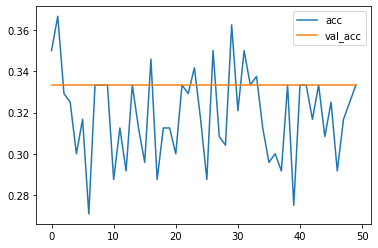

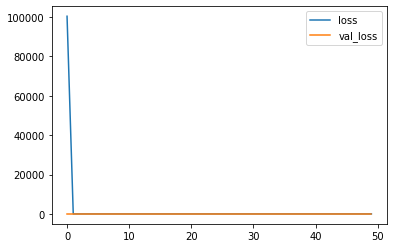

In [ ]:
import pandas as pd
histories = pd.DataFrame(model01.history.history)
histories[["acc", "val_acc"]].plot()
histories[["loss", "val_loss"]].plot()

##TRAINING & TESTING (LR = 0.8)

In [ ]:
model08 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(320,240,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])
model08.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 316, 236, 32)      832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 158, 118, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 154, 114, 64)      51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 77, 57, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 280896)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               71909632  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

In [ ]:
model08.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.8), metrics=['acc'])

In [ ]:
model08.fit_generator(train_generator, epochs=50, validation_data=test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
12/12 [==============================] - 4s 303ms/step - loss: 56608256.0000 - acc: 0.3958 - val_loss: 55327.9922 - val_acc: 0.3333
Epoch 2/50
12/12 [==============================] - 3s 274ms/step - loss: 80264.9609 - acc: 0.2875 - val_loss: 9471.7969 - val_acc: 0.3333
Epoch 3/50
12/12 [==============================] - 3s 273ms/step - loss: 718.1953 - acc: 0.3250 - val_loss: 8.3293 - val_acc: 0.3500
Epoch 4/50
12/12 [==============================] - 3s 269ms/step - loss: 1.6019 - acc: 0.3417 - val_loss: 8.4767 - val_acc: 0.3333
Epoch 5/50
12/12 [==============================] - 3s 271ms/step - loss: 1.2495 - acc: 0.3167 - val_loss: 9.0816 - val_acc: 0.3500
Epoch 6/50
12/12 [==============================] - 3s 271ms/step - loss: 1.1194 - acc: 0.3208 - val_loss: 9.2772 - val_acc: 0.3333
Epoch 7/50
12/12 [==============================] - 3s 271ms/step - loss: 1.1418 - acc: 0.2958 - val_loss: 9.3426 - val_acc: 0.3333
Epoch 8/50
12/12 [==============================] - 3s 2

##VISUALIZING

In [ ]:
accuracy08 = model08.history.history['acc']
loss08 = model08.history.history['loss']
val_loss08 = model08.history.history['val_loss']
val_acc08 = model08.history.history['val_acc']

print(accuracy08[-1])
print(val_acc08[-1])

0.2874999940395355
0.3333333432674408


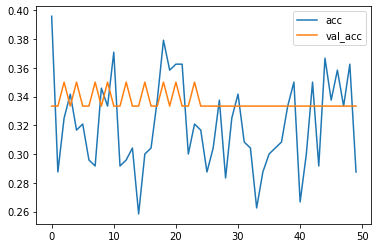

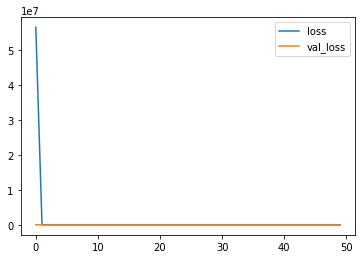

In [ ]:
import pandas as pd
histories = pd.DataFrame(model08.history.history)
histories[["acc", "val_acc"]].plot()
histories[["loss", "val_loss"]].plot()